In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
test=pd.read_csv(r'G:\Python\Machine Learning\Practice\Titanic - Machine Learning from Disaster\test.csv')
train=pd.read_csv(r'G:\Python\Machine Learning\Practice\Titanic - Machine Learning from Disaster\train.csv')
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,OrdinalEncoder


In [176]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [177]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [178]:
data=[train,test]


In [179]:
for df in data:
    df.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1, inplace=True)




In [180]:
for dataset in data:
    print(dataset.isnull().sum().sort_values(ascending=False))
    print('-' * 40)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64
----------------------------------------
Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64
----------------------------------------


In [181]:
KI=KNNImputer(n_neighbors=10)
for df in data:
    df['Age']=KI.fit_transform(df[['Age']])

In [182]:
si=SimpleImputer(strategy='most_frequent')
for df in data:
    df[['Embarked','Fare']]=si.fit_transform(df[['Embarked','Fare']])

    

In [183]:
for dataset in data:
    print(dataset.isnull().sum().sort_values(ascending=False))
    print('-' * 40)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------------------------------------
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------------------------------------


In [184]:
for df in data:
    print(df.select_dtypes(include=[np.number]).columns)
    print('-' * 40)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')
----------------------------------------
Index(['Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')
----------------------------------------


In [185]:
for df in data:
    print(df.select_dtypes(include=['object','category','bool']).columns)
    print('-' * 40)

Index(['Sex', 'Fare', 'Embarked'], dtype='object')
----------------------------------------
Index(['Sex', 'Fare', 'Embarked'], dtype='object')
----------------------------------------


In [186]:
categoric_cols = ['Sex', 'Embarked']

# Apply encoding to both train and test
data = [train, test]

for df in data:
    for col in categoric_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

In [187]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.25,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.925,2
3,1,1,0,35.000000,1,0,53.1,2
4,0,3,1,35.000000,0,0,8.05,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0,2
887,1,1,0,19.000000,0,0,30.0,2
888,0,3,0,29.699118,1,2,23.45,2
889,1,1,1,26.000000,0,0,30.0,0


In [188]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.05,2
414,1,0,39.00000,0,0,108.9,0
415,3,1,38.50000,0,0,7.25,2
416,3,1,30.27259,0,0,8.05,2


<Axes: xlabel='Pclass'>

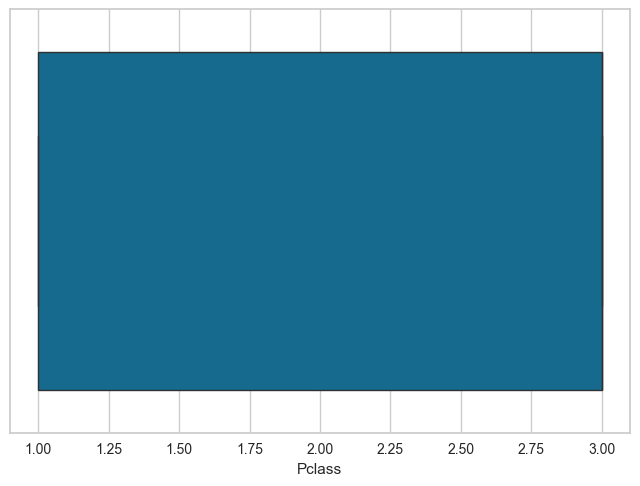

In [189]:
sns.boxplot(df,x='Pclass')

<Axes: xlabel='Age'>

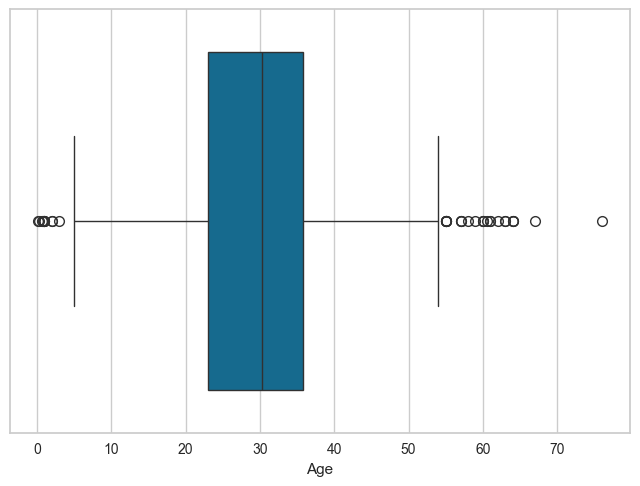

In [190]:
sns.boxplot(df,x='Age')

<Axes: xlabel='Parch'>

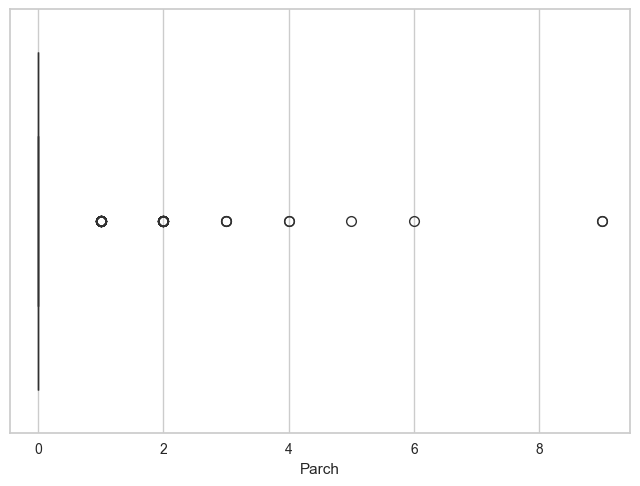

In [191]:
sns.boxplot(df,x='Parch')

In [192]:
num_cols = ['Age', 'Fare']

# Fit on train, transform on both train and test
scaler = RobustScaler()

train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])



In [193]:
from pycaret.regression import *

model = setup(data=train, target='Survived', session_id=123,n_jobs=3)

compare_models()

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Regression
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(891, 8)"
5,Transformed train set shape,"(623, 8)"
6,Transformed test set shape,"(268, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2657,0.1371,0.3690,0.4145,0.2589,0.3393,0.0320
catboost,CatBoost Regressor,0.2618,0.1439,0.3778,0.3855,0.2647,0.3297,0.4550
ada,AdaBoost Regressor,0.3077,0.1460,0.3805,0.3751,0.2731,0.3408,0.0120
lightgbm,Light Gradient Boosting Machine,0.2765,0.1479,0.3832,0.3677,0.2676,0.3371,0.0310
rf,Random Forest Regressor,0.2455,0.1488,0.3844,0.3646,0.2722,0.2909,0.0660
ridge,Ridge Regression,0.3032,0.1492,0.3854,0.3598,0.2724,0.3788,0.0070
lr,Linear Regression,0.3025,0.1492,0.3854,0.3597,0.2724,0.3780,0.0080
lar,Least Angle Regression,0.3025,0.1492,0.3854,0.3597,0.2724,0.3780,0.0070
br,Bayesian Ridge,0.3053,0.1493,0.3855,0.3596,0.2724,0.3813,0.0070
et,Extra Trees Regressor,0.2335,0.1590,0.3970,0.3194,0.2784,0.2883,0.0490


GradientBoostingRegressor(random_state=123)

In [ ]:
final_model = finalize_model('gbr')
predictions = predict_model(final_model, data=test)


In [195]:
test = pd.read_csv("test.csv")

# ✅ Save PassengerId BEFORE dropping columns
passenger_ids = test["PassengerId"]

# Now you can safely drop unnecessary columns
test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [196]:
submission = pd.DataFrame({
    'PassengerId': passenger_ids,  # from test set before dropping
    'Survived': predictions['prediction_label']  # this column has the predicted class (0 or 1)
})

submission.to_csv('submission_of_titanic.csv', index=False)